<a href="https://colab.research.google.com/github/felipeescorel/redes_neurais/blob/master/ClientesVM/Testes12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers,optimizers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ThresholdedReLU
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/felipeescorel/redes_neurais.git

Cloning into 'redes_neurais'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 198 (delta 0), reused 0 (delta 0), pack-reused 194
Receiving objects: 100% (198/198), 34.87 MiB | 34.13 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [0]:
data =  pd.read_csv('redes_neurais/ClientesVM/datasetV6.csv')
def normalize(x):
  min = data['rendaMedia'].min()
  max = data['rendaMedia'].max()
  return (x - min)/(max -min)

In [0]:
# Pré processamento

data['rendaMedia'] = data['rendaMedia'].map(normalize) 

train, test = train_test_split(data, test_size=0.2)
labels = train.ix[:,0]
X_train = train.ix[:,1:-1]
y_train = train.ix[:,'Aprovado']
X_test = test.ix[:,1:-1]
y_test = test.ix[:,'Aprovado']

In [8]:

print("gustavo otario")

gustavo otario


In [0]:
input_dim = X_train.shape[1]
nb_classes = y_train.shape[0]

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=input_dim,activation ='relu',kernel_initializer ='uniform'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [69]:
print("Training...")
history = model.fit(X_train,y_train, epochs=150, batch_size=64, validation_split=0.3, verbose=2, shuffle = True)


Training...
Train on 7839 samples, validate on 3361 samples
Epoch 1/150
 - 2s - loss: 2.4775 - acc: 0.5619 - val_loss: 0.6777 - val_acc: 0.5388
Epoch 2/150
 - 0s - loss: 0.7297 - acc: 0.5688 - val_loss: 0.6576 - val_acc: 0.6031
Epoch 3/150
 - 0s - loss: 0.6663 - acc: 0.5908 - val_loss: 0.7013 - val_acc: 0.5350
Epoch 4/150
 - 0s - loss: 0.6610 - acc: 0.5960 - val_loss: 0.6592 - val_acc: 0.5650
Epoch 5/150
 - 0s - loss: 0.6572 - acc: 0.5948 - val_loss: 0.6830 - val_acc: 0.6111
Epoch 6/150
 - 0s - loss: 0.6483 - acc: 0.6031 - val_loss: 0.6606 - val_acc: 0.6132
Epoch 7/150
 - 0s - loss: 0.6425 - acc: 0.6062 - val_loss: 0.6500 - val_acc: 0.6111
Epoch 8/150
 - 0s - loss: 0.6480 - acc: 0.6022 - val_loss: 0.6914 - val_acc: 0.4912
Epoch 9/150
 - 0s - loss: 0.6474 - acc: 0.5938 - val_loss: 0.6433 - val_acc: 0.6186
Epoch 10/150
 - 0s - loss: 0.6415 - acc: 0.6079 - val_loss: 0.6483 - val_acc: 0.6141
Epoch 11/150
 - 0s - loss: 0.6410 - acc: 0.6090 - val_loss: 0.6477 - val_acc: 0.6120
Epoch 12/150
 

In [70]:
score = model.evaluate(X_test,y_test)
print(score[1])

2800/2800 [==============================] - 0s 46us/step
0.615


<function matplotlib.pyplot.show>

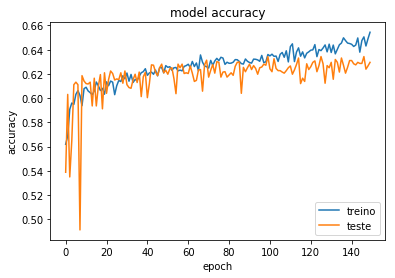

In [71]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracyo')
plt.xlabel('epoch')
plt.legend(['treino','teste'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

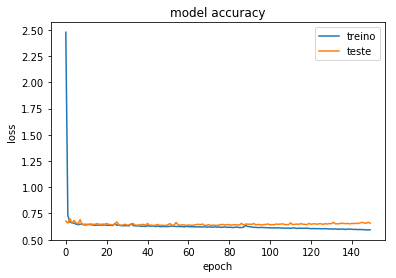

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','teste'],loc='upper right')
plt.show